# Анализ рынка видеоигр

## Введение

**Заказчик** - интернет-магазин, продающий компьютерные игры по всему миру.

**Цели работы:**

Выявить потенциально популярный продукт для планирования рекламной кампании

**Задачи:**
* определить закономерности определяющие успешность игры
* сделать прогноз по продажам на 2017 год


**Описание данных**

Исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы 

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
try:    
    data = pd.read_csv('games.csv' , sep = ',')
except:
    data = pd.read_csv('/datasets/games.csv', sep= ',')
data_check = data

In [3]:
data.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Проверка на явные дубликаты
data.duplicated().sum()

0

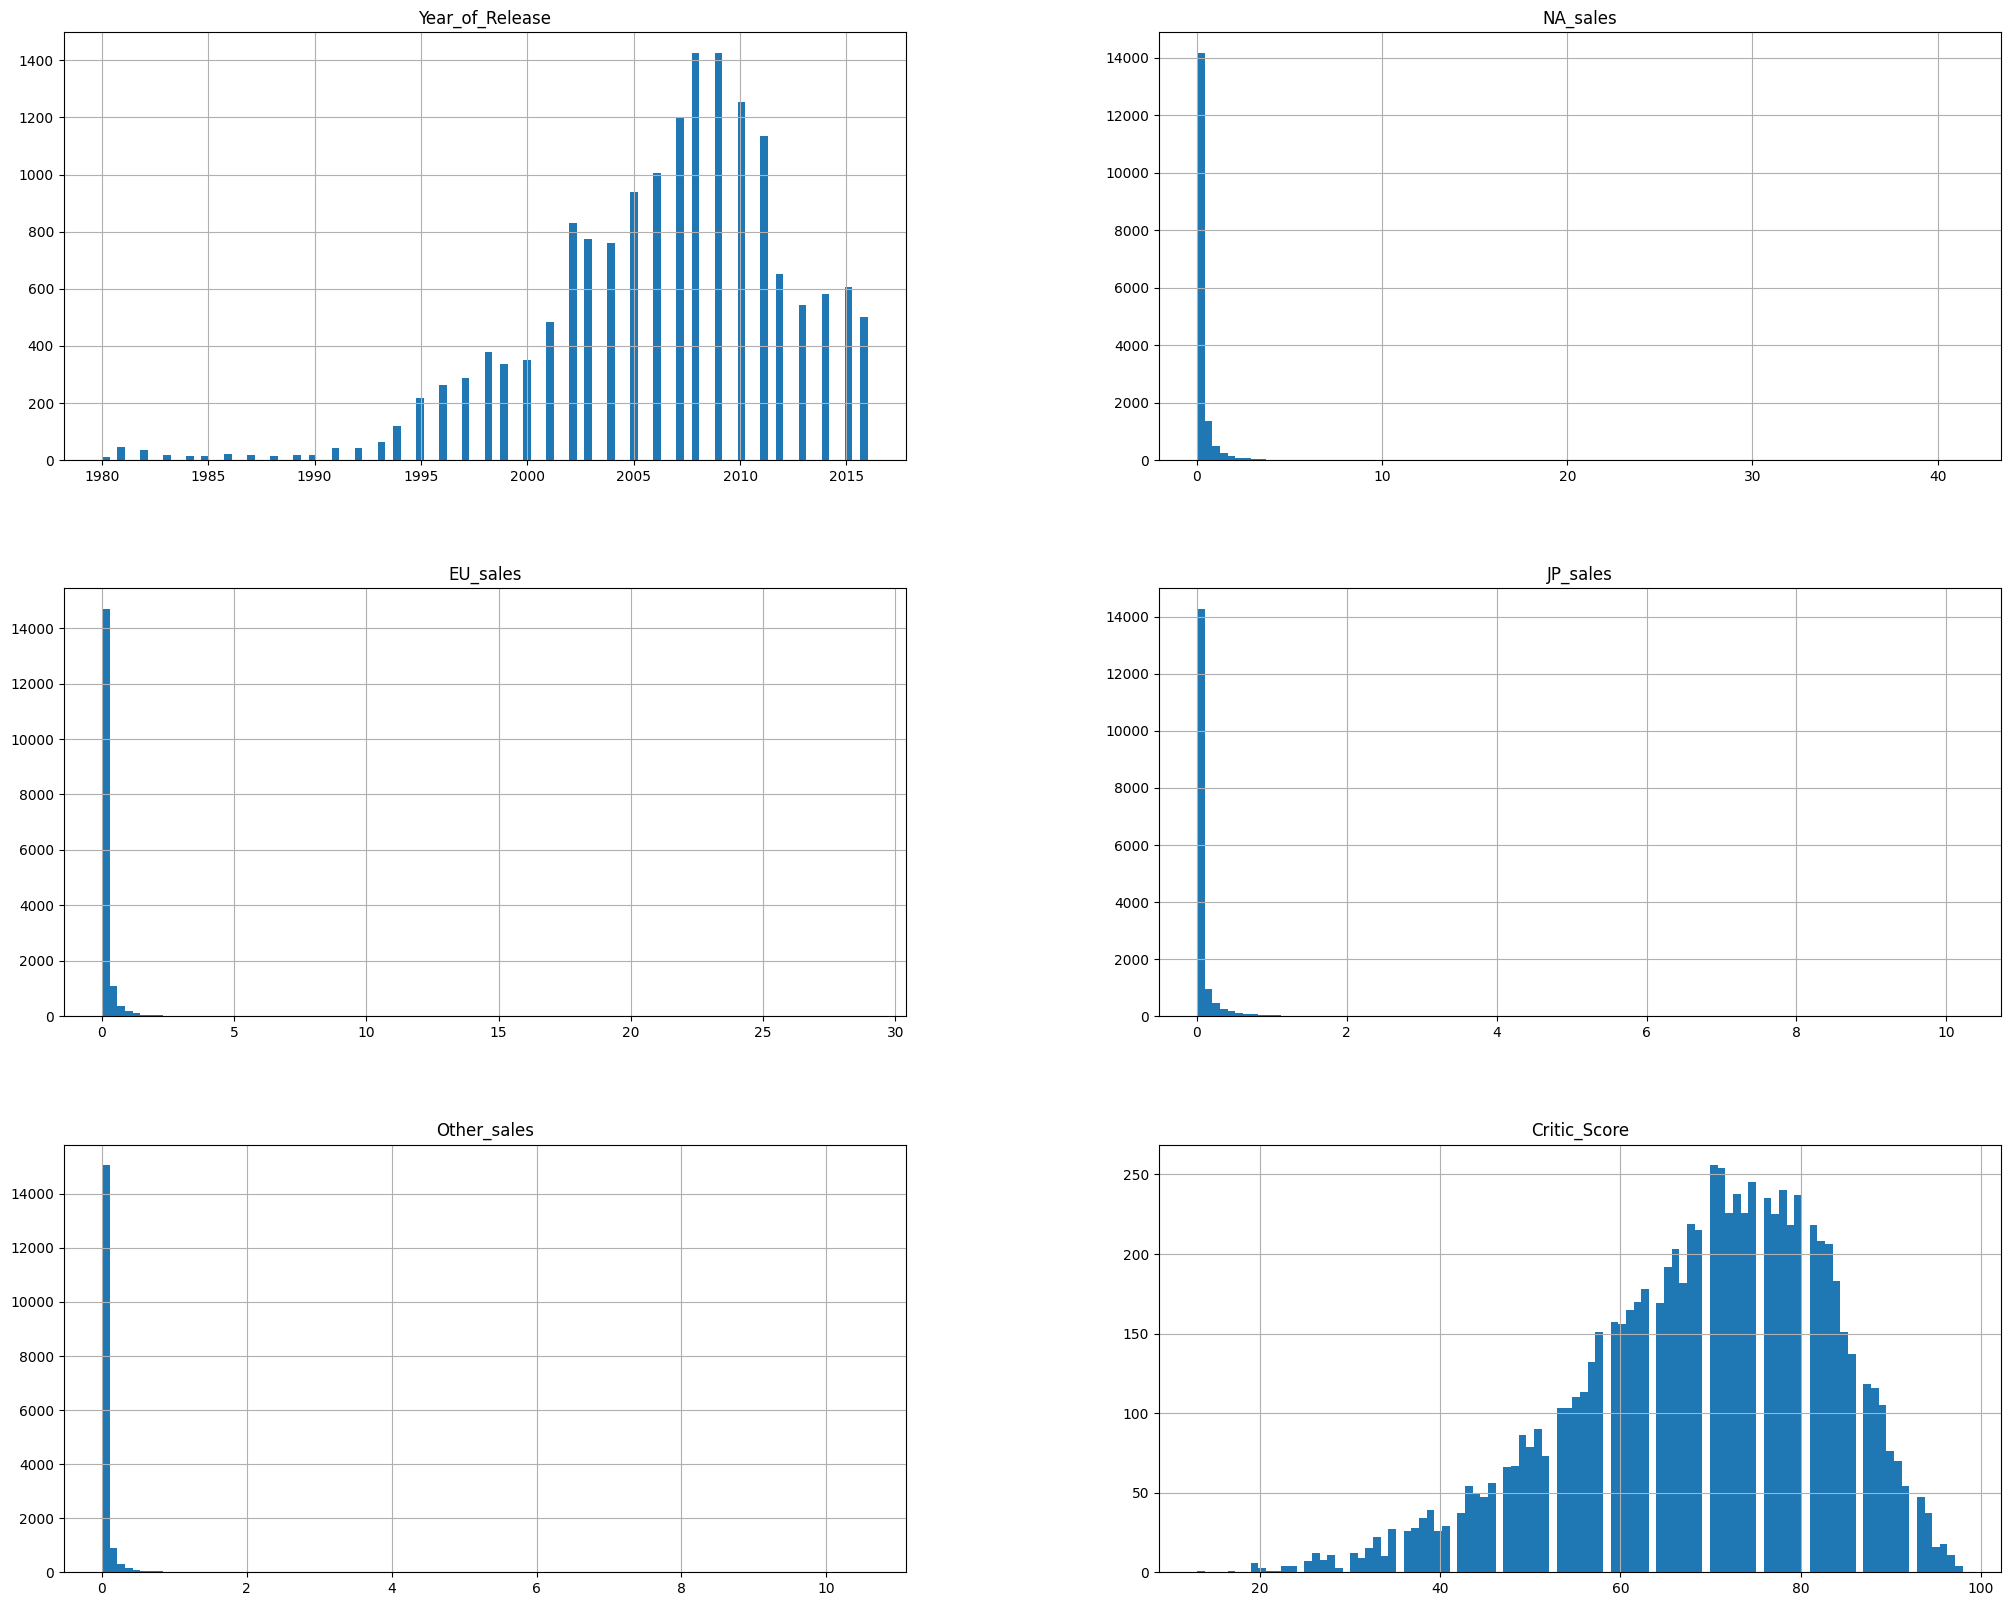

In [6]:
data.hist(bins = 100 , figsize= (25,20));

In [7]:
# посмотрю пропуски в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.set_precision(1).background_gradient('coolwarm')

/var/folders/j7/xy526g595ds1b1ybqxx1wpjr0000gp/T/ipykernel_15030/682860886.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame(round(data.isna().mean()*100,)).style.set_precision(1).background_gradient('coolwarm')


,0
Name,0.0
Platform,0.0
Year_of_Release,2.0
Genre,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0
Other_sales,0.0
Critic_Score,51.0
User_Score,40.0


Таким образом, в столбцах: 
* `Year_of_Release` - 2% пропусков,
* `Critic_Score` - 51% пропусков, 
* `User_Score` - 40% пропусков,
* `Rating` - 40% пропусков.

## Предобработка данных

### Понижение регистра

In [8]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Понижу регистр названий столбцов для удобства работы с данными
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Также имеет смысл понизить регистр значений в столбцах `name` , `platform` , `genre` для того, чтобы избавиться от возможных неявных дубликатов

In [11]:
print(len(data['name'].unique()) , '-  Игры') 
print(len(data['platform'].unique()) , '   -  Платформы')
print(len(data['genre'].unique()) , '   -  Жанры')

11560 -  Игры
31    -  Платформы
13    -  Жанры


In [12]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [13]:
print(len(data['name'].unique()) , '-  Игры') 
print(len(data['platform'].unique()) , '   -  Платформы')
print(len(data['genre'].unique()) , '   -  Жанры')

11560 -  Игры
31    -  Платформы
13    -  Жанры


Ничего не поменялось.

### Изменение типов данных

In [14]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [15]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` содержатся числа, имеющие формат `object`, то есть проводить арифметические операции с данными значениями не получится. Соответственно необходимо перевести формат во `float` или `int`. Для того, чтобы это сделать, необходимо избавиться от некоего значения `tbd`.

Прежде чем избавляться, выясним что оно обозначает.

Согласно данным из Cambridge Dictionary, TBD это: 
>written abbreviation for to be decided or to be determined: used when something has not yet been decided or is not yet known

то есть, данная аббревиатура обозначает, что решение еще не принято или неизвестно. В нашем случае это означает, что оценки еще не опубликовали. Это типично для новых игр, оценки проходят модерацию, чтобы избежать исскуственной накрутки, либо понижения рейтинга. Также, причиной может быть малое количество оценок.

Посмотрим как данное значение распределяется по годам.

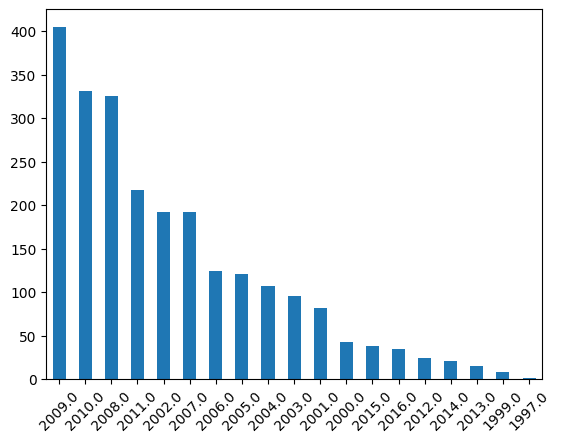

In [16]:
data[data['user_score'] == 'tbd']['year_of_release']\
.value_counts()\
.plot(kind = 'bar' , rot = 45);

In [17]:
# сколько tbd  в 2016 году
data[(data['user_score'] == 'tbd') & (data['year_of_release'] == 2016)]['year_of_release'].count()

34

График показывает, что `tbd` присутствует во всех годах, то есть это относится не только к новинкам. Поскольку, ничем заменить это значение не получится, а удаление приведет к потере данных, то заменяю его на nan.

In [18]:
data['user_score'] = data[data['user_score'] != 'tbd']['user_score']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь можно заменить тип стобца `user_score` на `float`

In [20]:
data['user_score'] = data['user_score'].astype(float)

In [21]:
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


У нас есть два столбца с оценками - это оценки от критиков и оценки от игроков. Значения в этих столбцах имеют разные порядки относительно друг друга. Приведу столбец `user_score` к одному порядку с `critic_score`, умножив первый на 10

In [22]:
data['user_score'] = data['user_score'] * 10

In [23]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E


### Обработка пропусков

In [24]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Итак, есть пропуски в столбцах `year_of_release`, `critic_score`, `user_score`, `rating`.

Кроме того, имеется по два пропуска в столбцах `name` и `genre`. Посмотрю на них.

In [25]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на то, что тут всего две строки, эти данные могут пригодиться в исследовании продаж по платформам и распределению их по годам. Пока удалять не буду.

**Пропуски в `rating`**

In [26]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Известно, что данные в столбце `rating`, это рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Ассоциация была основана в 1994 году. Ее основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

В Европе возрастными рейтингами занимается компания PEGI, в Японии - CERO.

В работе необходимо провести исследование - *влияет ли рейтинг ESRB на продажи в отдельном регионе?*

Различия в рейтингах между странами состоят в следующем:

|Возраст\Название|ESRB (US) |PEGI (EU)|CERO (JP)|
|:-----------:|:--------:|:-------:|:-------:|
|Для всех      |E/K-A     |3        |A        |
|3+           |EC        | -       |-        |
|7+           | -        |7        | -       |
|10+          |E10+      | -       | -       |
|12+          | -        | 12      |B        |
|13+          |T         | -       | -       |
|15+          | -        | -       |C        |
|16+          | -        |16       | -       |
|17+          |M         | -       |D        |
|18+          |AO        |18       |Z        |
|tbd          |RP        | -       | -       |

Рейтинги всех стран совпадают только в возрастных категориях `для всех` и `18+`, то есть в исследовании влияния рейтинга на продажи правильно было бы учитывать только эти категории.

Также, необходимо заменить значение `K-A` на `E`, поскольку это устаревшее обозначение рейтинга.

In [28]:
data.query('rating.notna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,80.0,E
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,85.0,E
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,66.0,E
...,...,...,...,...,...,...,...,...,...,...,...
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.00,0.00,53.0,NaN,E
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E
16702,storm: frontline nation,pc,2011.0,strategy,0.00,0.01,0.00,0.00,60.0,72.0,E10+
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.00,0.00,NaN,NaN,E


In [29]:
data.query('rating == "K-A"')['rating'].count()

3

In [30]:
# всего 3 значения
data['rating'] = data['rating'].replace('K-A' , 'E' , regex = True)

In [31]:
data.query('rating == "K-A"')['rating'].count()

0

**Пропуски в `critic_score`, `user_score` и `rating`**

В столбцах `critic_score`, `user_score`, `rating` содержится огромное количество пропусков, почти почти половина от общего количества. На данный момент, все, что я могу сделать - это посмотреть - совпадают ли эти пропуски друг с другом.


In [32]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [33]:
data[(data['rating'].isna())].count()

name               6764
platform           6766
year_of_release    6678
genre              6764
na_sales           6766
eu_sales           6766
jp_sales           6766
other_sales        6766
critic_score         83
user_score           86
rating                0
dtype: int64

Среди 6766 пустых значений столбца `rating`, всего по 80 непустых значений `critic_score` и `user_score`.

In [34]:
data[(data['critic_score'].isna())].count()

name               8576
platform           8578
year_of_release    8463
genre              8576
na_sales           8578
eu_sales           8578
jp_sales           8578
other_sales        8578
critic_score          0
user_score          573
rating             1895
dtype: int64

Среди 8578 пустых значений столбца `critic_score` 573 непустых значения столбца `user_score` и 1895 значений `rating`.

In [35]:
data[(data['user_score'].isna())].count()

name               9123
platform           9125
year_of_release    8983
genre              9123
na_sales           9125
eu_sales           9125
jp_sales           9125
other_sales        9125
critic_score       1120
user_score            0
rating             2445
dtype: int64

У самого многочисленного по пропускам столбца `user_score` 1120 непустых значений `critic_score` и 2445 значений `rating`.

---

В исследовательской части работы предстоит рассмотреть влияние рейтинга ESRB на продажи по регинонам, то для полноценной картины необходимо заменить пропущенные значения в столбце `rating`, поскольку продажи именно этих игр могут указать на ключевое различие в регионах. Чтобы каким то образом учесть эти данные, заменю пропущенные значения на `unknown`.

In [36]:
data.rating.isna().sum()

6766

In [37]:
data['rating'] = data['rating'].fillna('unknown')

In [38]:
data.rating.isna().sum()

0

In [39]:
data.rating.unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Можно сказать, что пропуски в этих столбцах по большей части находятся в одних и тех же строках, то есть при дальнейшем анализе влияния отзывов на покупаемость игр, получаемые зависимости будут почти без искажений.

Пропуски в столбце `rating`могут оказать существенное влияние на дальнейший анализ, поэтому были заменены на значение `unknown`.

Предложить целесообразный метод обработки пропусков в столбцах `critic_score` и `user_score` не получается. Удалять нельзя - потеряется слишком много данных. Замена медианным значением особо картины не исправит, все таки пропусков около половины строк. Остается только оставить все как есть.

## Исследовательский анализ данных

### Игры по годам

Посмотрим, сколько игр выпускалось в разные годы.

In [40]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E


<Axes: title={'center': 'Количество релизов игр в зависимости от года'}, xlabel='Год релиза', ylabel='Количество игр'>

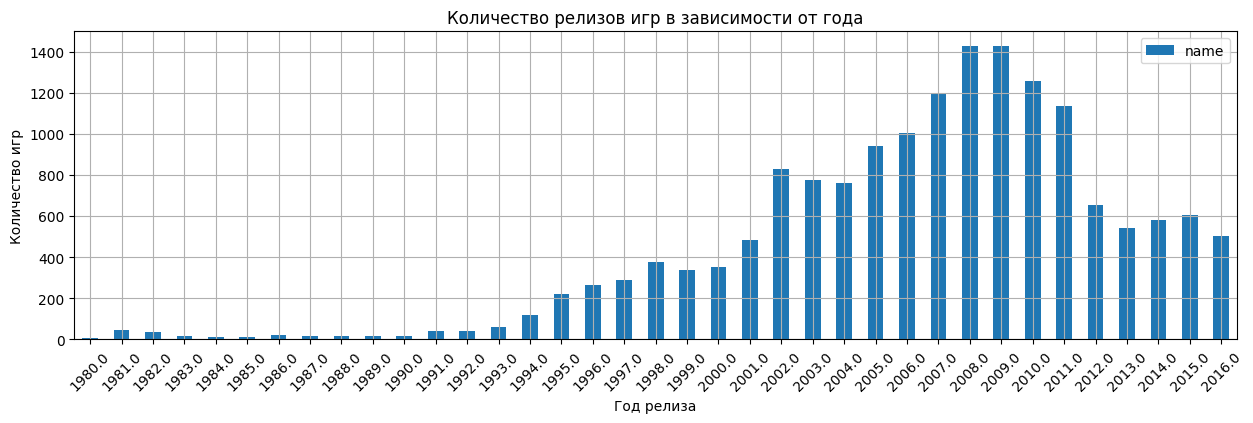

In [41]:
(
    data.groupby("year_of_release")["name"]
    .count()
    .reset_index()
    .plot(
        kind="bar",
        x="year_of_release",
        y="name",
        rot=45,
        figsize=(15, 4),
        grid=True,
        title="Количество релизов игр в зависимости от года",
        xlabel="Год релиза",
        ylabel="Количество игр",
    )
)

Игровая индустрия начала активно развиваться начиная с 1993 года, с каждым последующим годом выпуская все больше игр. Пики по количеству выпущенных игр приходятся на 2008 и 2009 год - по 1400 игр на каждый. Далее кривая количества снижается, вероятно, качество начинает преобладать над количеством. с 2012 по 2016 выпускалось уже в районе 500-600 игр в год.

Считаю, что данные до 1993 года можно не учитывать.

### Продажи по платформам

Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Оценим срок жизни платформ.

Прежде всего, добавим с общей суммой продаж в датафрейм

In [42]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24


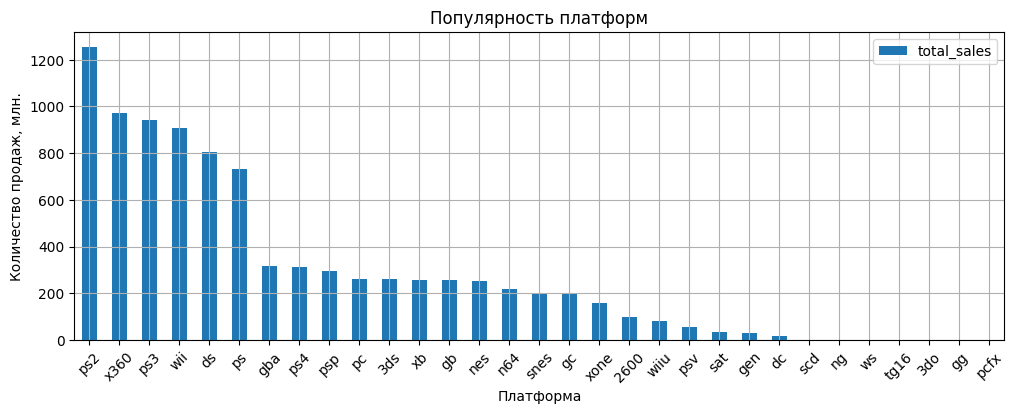

In [43]:
(
    data
    .groupby('platform')['total_sales'].sum()
    .reset_index().sort_values(by = 'total_sales', ascending = False)
    .plot(
        kind = 'bar' , x = 'platform' , y = 'total_sales' , 
        rot = 45 , figsize = (12 , 4) , grid = True, 
        title = 'Популярность платформ', 
        xlabel = 'Платформа', ylabel = 'Количество продаж, млн.'
    )
);

Среди всех значений, на данном графике сильно выделяются первые шесть платформ: `ps2`, `x360`, `ps3`, `wii`, `ds` и `ps`.

Отбросим все остальные платформы и для топ-6 построим распределение общих продаж по годам.

In [44]:
platform_grouped = (
    data
    .groupby('platform')['total_sales'].sum()
    .reset_index()
    .query('total_sales > 400')['platform']
)

In [45]:
platform_good_sales = (
    data[data['platform'].isin(platform_grouped)]
    .groupby(['year_of_release' , 'platform'])['total_sales'].sum().reset_index()
)

platform_good_sales

,year_of_release,platform,total_sales
0,1985.0,ds,0.02
1,1994.0,ps,6.03
2,1995.0,ps,35.96
3,1996.0,ps,94.70
4,1997.0,ps,136.17
...,...,...,...
62,2015.0,wii,1.14
63,2015.0,x360,11.96
64,2016.0,ps3,3.60
65,2016.0,wii,0.18


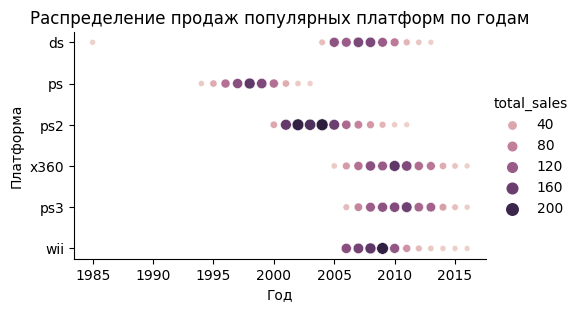

In [46]:
(
    sns.relplot(
        data = platform_good_sales , 
        x = 'year_of_release' , 
        y = 'platform' , 
        hue = 'total_sales', 
        size = 'total_sales' , 
        height = 3 , 
        aspect = 1.7
    )
    .set(
        title = 'Распределение продаж популярных платформ по годам' , 
        xlabel = 'Год' , ylabel = 'Платформа'
    )
);

Судя по графику, наиболее успешными платформами с большим количеством продаж были:
* ds - в течение 5 лет продано 600-800 млн копий, игры перестали выходить в 2014 году.
* ps - в течение 5 лет продано ~700 млн копий, игры перестали выходить в 2004 году.
* ps2 - втечение 5 лет продано ~900 млн копий, игры перестали выходить в 2012 году.
* wii - в первые 5 лет продано  ~740 млн копий, игры до сих пор выходят, но продажи снизились в 3-4 раза. Платформа в середине своего жизненного цикла.
* x360 и ps3 - ~700 млн копий за 5 лет. Платформы в конце своего жизненного цикла.

In [47]:
#Рассчитаем средний срок жизни платформы
years_min_max = data.pivot_table(
    index = 'platform',
    values = 'year_of_release',
    aggfunc = ['min' , 'max']).reset_index()

# переименую колонки
years_min_max.columns = ['platform' , 'min_year' , 'max_year']

# добавляю столбец со сроком жизни платформ и считаю медиану
years_min_max['platform_life_cycle'] = years_min_max['max_year'] - years_min_max['min_year']
years_min_max['platform_life_cycle'].median()

6.0

Средний срок жизнии платформы составляет 6 лет.

### Прогноз на 2017 год

В прошлом пункте мы выяснили какой средний год жизни платформы. Для прогноза на 2017 год возьмем данные за 2014-2016 года и посмотрим какие платформы приближаются к концу жизненного цикла, а какие только в начале.

Создадим срез датафрейма по актуальным годам:

In [48]:
data_actual_years = data.query('year_of_release >= 2014')

In [49]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54


In [50]:
years_to_predict = (
    data_actual_years
    .groupby(['year_of_release' , 'platform'])['total_sales']
    .sum().reset_index()
)

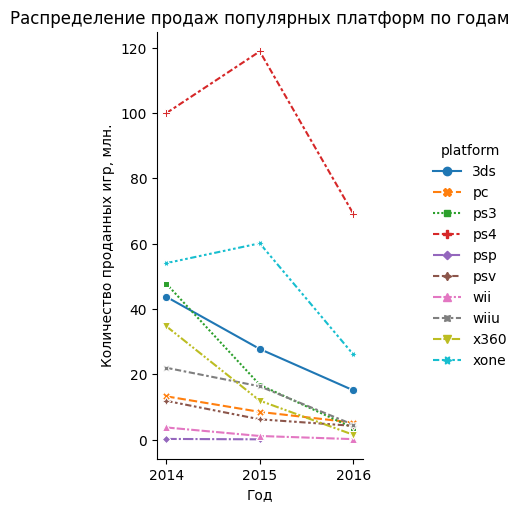

In [51]:
(
    sns.relplot(
        data = years_to_predict, 
        x='year_of_release', 
        y='total_sales' , 
        hue = 'platform',
        kind = 'line' , 
        markers = True , 
        style = 'platform',
        height = 5 , aspect = .6
    )
    .set(
        title = 'Распределение продаж популярных платформ по годам' , 
        xlabel = 'Год' , 
        ylabel = 'Количество проданных игр, млн.'
    )
);

In [52]:
data.query('year_of_release >= 2015').groupby('year_of_release')['total_sales'].sum()

year_of_release
2015.0    267.98
2016.0    129.94
Name: total_sales, dtype: float64

Картина за 2014-2106гг. показывает общий спад продаж для всех платформ, за исключением двух - `ps4` и `xone`.

* `ps4` - платформа, вышешдшая на смену `ps3` за полтора года сравнялась по продажам со своей прдшественницей и, с каждым годом увеличивая продажи, в 2015 году достигла пика в 120 млн проданных копий, в 2016 году виден резкий спад продаж почти в два раза, что можно объяснить неполными данными за 2016 год. 
* `xone` - данная платформа как и `ps4` вышла в 2013 году, но, судя по суммарным продажам, не повторила успеха конкуреннта - значения продаж в каждом году ~ в 2 раза меньше, чем у `ps4` - 25млн копий.

Таким образом, наиболее перспективными, за счет своей "молодости", являются платформы `ps4` и `xone`. Также, стоит отметить `pc`, как самую стабильную платформу, окончания жизненного цикла которой в ближайшие годы не ожидается.

### Глобальные продажи по платформам

In [53]:
# переменная для сортировки графика
order_values = (
    data.groupby("platform")["total_sales"]
    .median()
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

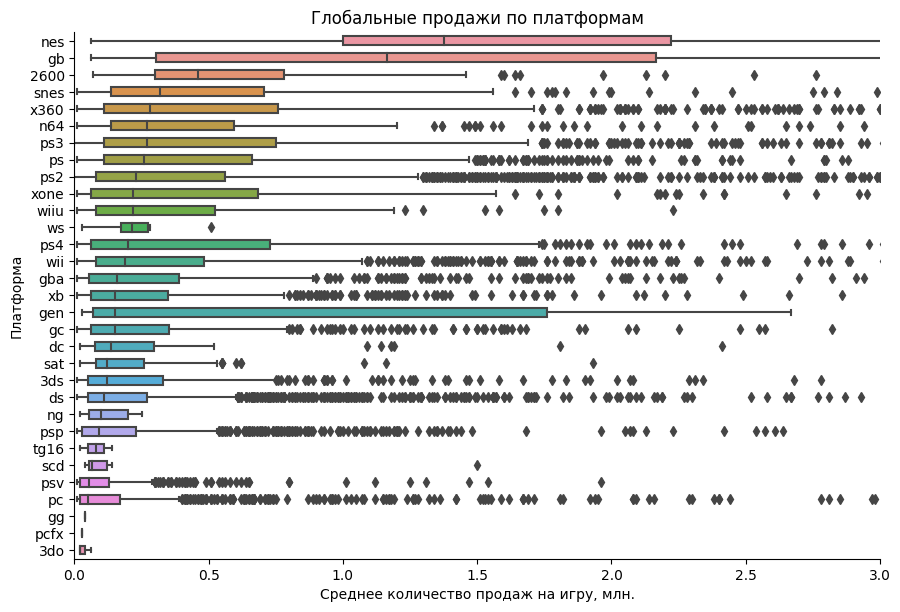

In [54]:
sns.catplot(
    data=data,
    x="total_sales",
    y="platform",
    kind="box",
    orient="h",
    height=6,
    width=0.5,
    aspect=1.5,
    order=order_values["platform"],
).set(
    xlim=(0, 3),
    title="Глобальные продажи по платформам",
    xlabel="Среднее количество продаж на игру, млн.",
    ylabel="Платформа",
)


Несмотря на то, что активное развитие игровой индустрии пришлось на середину 90-х и с каждым годом количество продаваемых игр, как и выпускаемых платформ росло, тем не менее по медианным зачениям продаж лидируют платформы вышедшие в 80-90-х годах:
* nes - Nintendo Entertainment System - 1983 год - 1.375 млн.,
* gb - Game Boy - 1988 - 1.18 млн.,
* 2600 - Atari VCS - 1980 - 0.48 млн.

Ближайшими к тройке лидеров современными платформами являются:
* x360 - Xbox 360 - 0.28 млн.,
* ps3 - PlayStation 3 - 0.28 млн.,
* xone - Xbox One - 0.22 млн.

Посмотрю на такой же график, только за актуальные года

In [55]:
# переменная для сортировки графика
order_values = (
    data_actual_years.groupby("platform")["total_sales"]
    .median()
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

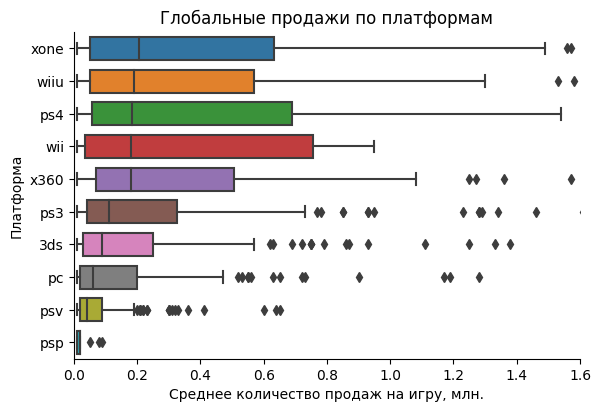

In [56]:
sns.catplot(
    data=data_actual_years,
    x="total_sales",
    y="platform",
    kind="box",
    orient="h",
    height=4,
    width=0.7,
    aspect=1.5,
    order=order_values["platform"],
).set(
    xlim=(0, 1.6),
    title="Глобальные продажи по платформам",
    xlabel="Среднее количество продаж на игру, млн.",
    ylabel="Платформа",
)


Глядя на зависимость медианных значений общих продаж в разбивке по платформам за актуальный период можно увидеть четверку платформ-лидеров - `xone`, `wiiu`, `ps4` и `wii`.

В предыдущем пункте, при поиске наиболее перспективных платформ на 2017 год, график распределения суммарных продаж по платформам за период 2014-2016гг. показал, что суммарных продаж на `ps4` ~ в 2 раза больше, чем у `xone` за тот же период. Тем не менее, медианное значение продаж у xone превышает медианное у `ps4`. Вероятно, так получилось из-за выхода суперпопулярных игр, у которых большое количество продаж и на ящике с усами они находятся в выбросах. То есть продажи игр у `xone` более стабильные.

У платформы `wiiu`, ее медианное значение продаж такое же как и у `ps4`. Это относительно молодая платформа, всего на год старше `ps4` и без учета данных 2016 года показывает относительно стабильные продажи.

Платформа `wii` вышла в 2006 году, ее преемницей является `wiiu` и в ближайшее время жизненный цикл `wii` закончится.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [57]:
# Определим тройку самых продаваемых платформ с непустыми значениями отзывов
(
    data_actual_years
    .query('critic_score.notna() and user_score.notna()')
    .groupby('platform')['total_sales'].sum()
    .reset_index()
    .sort_values(by = 'total_sales' , ascending = False)
    .head(3)
)

,platform,total_sales
3,ps4,219.20
7,xone,115.29
5,wiiu,33.83


Построим графики рассеяния и рассчитаем коэффициенты корреляции для платформы `ps4`

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Зависимость продаж от отзывов критиков'}, xlabel='Продажи', ylabel='Отзыв критика'>

<Axes: title={'center': 'Зависимость продаж от отзывов пользователей'}, xlabel='Продажи', ylabel='Отзыв пользователя'>

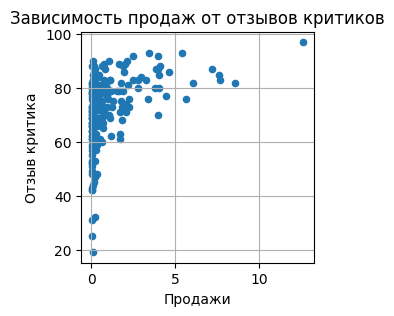

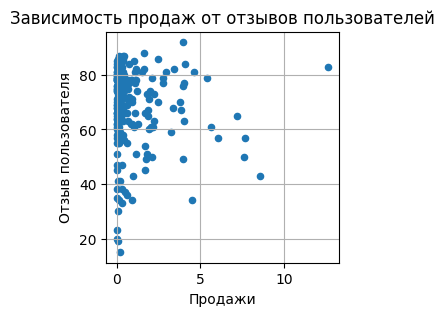

In [58]:
display(
    data_actual_years.query('platform == "ps4"').plot(
        kind="scatter",
        x="total_sales",
        y="critic_score",
        grid=True,
        figsize=(3, 3),
        title="Зависимость продаж от отзывов критиков",
        xlabel="Продажи",
        ylabel="Отзыв критика",
    )
)

data_actual_years.query('platform == "ps4"').plot(
    kind="scatter",
    x="total_sales",
    y="user_score",
    grid=True,
    figsize=(3, 3),
    title="Зависимость продаж от отзывов пользователей",
    xlabel="Продажи",
    ylabel="Отзыв пользователя",
)


Рассчитаем коэффициент корреляции 

In [59]:
(
    data_actual_years
    .query('platform == "ps4"')['total_sales']
    .corr(
        data_actual_years.query('platform == "ps4"')['critic_score']
    )
    .round(2)
)

0.4

In [60]:
(
    data_actual_years
    .query('platform == "ps4"')['total_sales']
    .corr(
        data_actual_years.query('platform == "ps4"')['user_score']
    )
    .round(2)
)

-0.04

Судя по значениям коэффициента корреляции, зависимость имеется только для отзывов критиков, но довольно слабая.

Отзывы пользователей не влияют на продажи, коэффициент корреляции  -0.04, в то время как отзывы критиков имеют некоторое влияние на продажи, коэффициент корреляции равен 0.4.

In [61]:
# для удобства и экономии места
df_act_yrs = data_actual_years

In [62]:
plat = []
corr_user = []
corr_critic = []

for t in df_act_yrs.platform.unique():
    plat.append(t)
    corr_user.append(
        df_act_yrs[df_act_yrs["platform"] == t]["total_sales"].corr(
            df_act_yrs[df_act_yrs["platform"] == t]["user_score"]
        )
    )
    corr_critic.append(
        df_act_yrs[df_act_yrs["platform"] == t]["total_sales"].corr(
            df_act_yrs[df_act_yrs["platform"] == t]["critic_score"]
        )
    )

corr_dict = {
    "platform": plat,
    "user_correlation": corr_user,
    "critic_correlation": corr_critic,
}
data_corr = pd.DataFrame(corr_dict)
data_corr.head(1)

,platform,user_correlation,critic_correlation
0,ps4,-0.040132,0.402661


<Axes: title={'center': 'Корреляция между продажами и отзывами критиков'}, xlabel='Платформа', ylabel='Коэффициент корреляциии'>

<Axes: title={'center': 'Корреляция между продажами и отзывами пользователей'}, xlabel='Платформа', ylabel='Коэффициент корреляциии'>

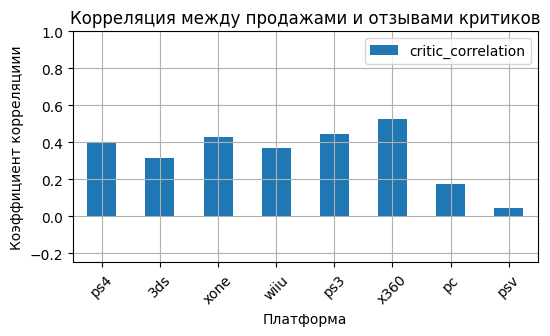

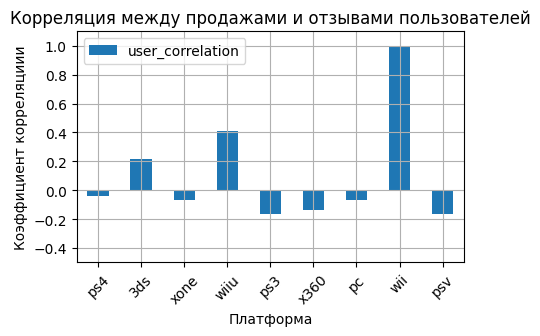

In [63]:
display(
    data_corr.query("critic_correlation.notna()").plot(
        x="platform",
        y="critic_correlation",
        kind="bar",
        rot=45,
        grid=True,
        ylim=(-0.25, 1),
        figsize=(6, 3),
        title="Корреляция между продажами и отзывами критиков",
        xlabel="Платформа",
        ylabel="Коэффициент корреляциии",
    )
)

data_corr.query("user_correlation.notna()").plot(
    x="platform",
    y="user_correlation",
    kind="bar",
    rot=45,
    grid=True,
    ylim=(-0.5, 1.1),
    figsize=(5, 3),
    title="Корреляция между продажами и отзывами пользователей",
    xlabel="Платформа",
    ylabel="Коэффициент корреляциии",
)


Коэффициент корреляции по пользователям и продажам между всеми платформами принимает как положительные, так и отрицательные значения, то есть нельзя уверенно сказать о прямой зависимости.

Коэффициент корреляции по критикам и продажам показывает более интересную картину - значения коэффициента положительные и лежат в диапазоне от 0.04 до 0.53. В данном случае можно сказать, что зависимость есть, что люди прислушиваются к мнению критиков перед покупкой той или иной игры.

#### Жанры

Посмотрим общее распределение игр по жанрам. Выявим самые прибыльные жанры.

Посмотрим средние значения общих продаж в разбивке по жанрам

<Axes: title={'center': 'Популярность жанров'}, xlabel='Жанр', ylabel='Медиана продаж'>

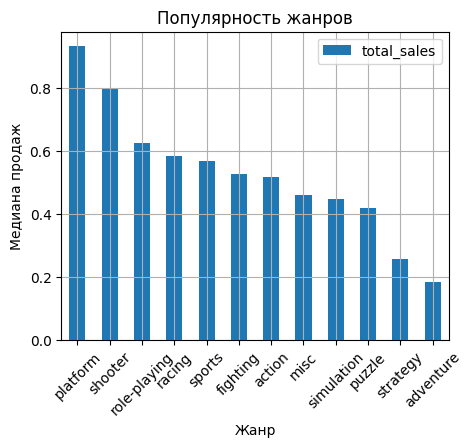

In [64]:
data.groupby("genre")["total_sales"].mean().reset_index().sort_values(
    by="total_sales", ascending=False
).plot(
    kind="bar",
    x="genre",
    y="total_sales",
    rot=45,
    figsize=(5, 4),
    grid=True,
    title="Популярность жанров",
    xlabel="Жанр",
    ylabel="Медиана продаж",
)

Самые высокие средние продажи имеют жанры `platform` и `shooter` - в среднем одна игра продается 0.9 и 0.8 млн. раз соответственно.

Самыми низкопродаваемыми жанрами являются - `adventure` и `strategy` - 0.20-0.25 млн продаж на игру.

### Портреты пользователей

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияение рейтинга ESRB на продажи в отдельном регионе

Данное исследование проведем, учитывая только актуальные года.

In [65]:
# группировка по платформе
jp_platform_top = (
    df_act_yrs.groupby("platform")["jp_sales"]
    .median()
    .reset_index()
    .sort_values(by="jp_sales")
    .tail()
)

na_platform_top = (
    df_act_yrs.groupby("platform")["na_sales"]
    .mean()
    .reset_index()
    .sort_values(by="na_sales")
    .tail()
)

eu_platform_top = (
    df_act_yrs.groupby("platform")["eu_sales"]
    .mean()
    .reset_index()
    .sort_values(by="eu_sales")
    .tail()
)

jp_platform_top.head(1)

,platform,jp_sales
3,ps4,0.015


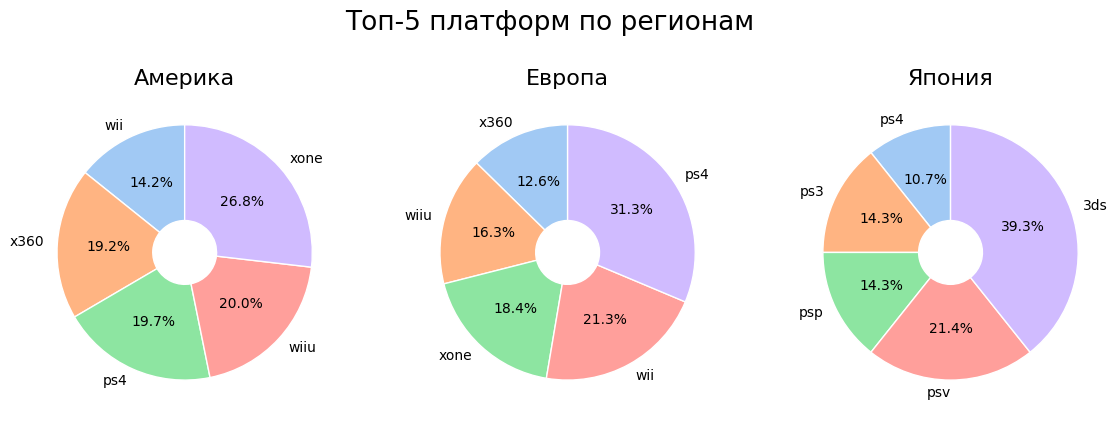

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")[0:5]
size = 0.75

ax1.pie(
    na_platform_top["na_sales"],
    labels=na_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_platform_top["eu_sales"],
    labels=eu_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_platform_top["jp_sales"],
    labels=jp_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ-5 платформ по регионам", fontsize=19)
plt.show()

В Америке и Европе предпочитают стационарые платформы, в то время как в Японии - 75% портативные (`3ds`, `psv` и `psp`) и 25% - стационарные (`ps3` и `ps4`). Кроме того, японцы предпочитают отечественного производителя.

Поскольку, `wii` и `wiiu`, `x360` и `xone` разные поколения одной платформы, думаю, что их можно считать как одну категорию. Поскольку консоли старого поколения подходят к концу жизненного цикла, обладающие ей пользователи, с большой вероятностью перейдут на консоли нового поколения как только перестанут выходить игры на старую.

В Америке наиболее популярной платформой является `x360` и ее преемница `xone` - по 26.3%. Следующая группа по популярности - `wiiu` и `wii` - 23.7% и 10.5%. И, наконец, `ps4` - 13.2%.

В Европе на семейство `wii` проиходится 48.6% на двоих: 32.4% - `wii` и 16.2% - `wiiu`. Следующая группа - `xone` и `x360` - 18.9% и 13.5%. И, наконец, `ps4` - 18.9%.

In [67]:
# группировка по жанрам
jp_genre_top = (
    df_act_yrs.groupby("genre")["jp_sales"]
    .median()
    .reset_index()
    .sort_values(by="jp_sales")
    .tail()
)

na_genre_top = (
    df_act_yrs.groupby("genre")["na_sales"]
    .median()
    .reset_index()
    .sort_values(by="na_sales")
    .tail()
)

eu_genre_top = (
    df_act_yrs.groupby("genre")["eu_sales"]
    .median()
    .reset_index()
    .sort_values(by="eu_sales")
    .tail()
)

jp_genre_top.head(1)

,genre,jp_sales
1,adventure,0.01


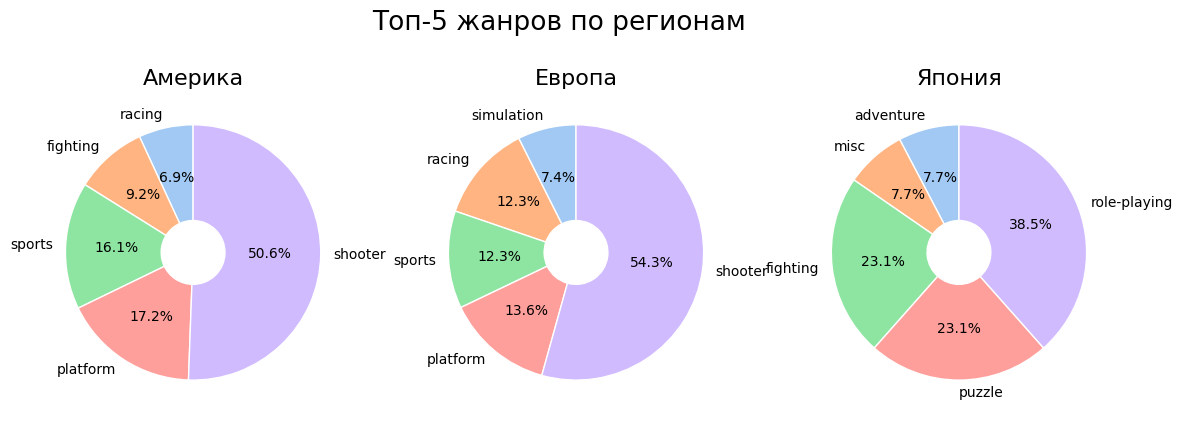

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")
size = 0.75

ax1.pie(
    na_genre_top["na_sales"],
    labels=na_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_genre_top["eu_sales"],
    labels=eu_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_genre_top["jp_sales"],
    labels=jp_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ-5 жанров по регионам", fontsize=19)
plt.show()

В отношении жанров Япония снова выделяется - 38.5% продаж приходится на `role-playing`, по 23.1% на `puzzle` и `fighting` и по 7.7% на `adventure` и `misc`.

В Европе с Америкой картина по топ-3 жанрам в целом одинаковая: более 50% приходится на жанр `action`, 12-16% на жанр `sports` и 13-17% на жанр `platform`. Еще один общий жанр - `racing` - 12.3% для Европы и 6.9% для Америки. Оставшиеся доли приходятся на `fighting` в Америке - 9.2%, и `simulation` для Европы - 7.4%.

---

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Ранее было обозначено, что каждый из регионов имеет свой внутренний рейтинг видеоигр и пересечения в возрастных категориях наблюдаются только для категорий "для всех" и "18+". Тем не менее, проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
len(data.rating.unique())

8

In [70]:
# группировка по рейтингу
jp_rating_top = (
    df_act_yrs.groupby("rating")["jp_sales"]
    .median()
    .reset_index()
    .sort_values(by="jp_sales")
)
jp_rating_top = jp_rating_top[jp_rating_top["jp_sales"] != 0]

na_rating_top = (
    df_act_yrs.groupby("rating")["na_sales"]
    .median()
    .reset_index()
    .sort_values(by="na_sales")
)
na_rating_top = na_rating_top[na_rating_top["na_sales"] != 0]

eu_rating_top = (
    df_act_yrs.groupby("rating")["eu_sales"]
    .median()
    .reset_index()
    .sort_values(by="eu_sales")
)
eu_rating_top = eu_rating_top[eu_rating_top["eu_sales"] != 0]

jp_rating_top

,rating,jp_sales
3,T,0.01
4,unknown,0.02


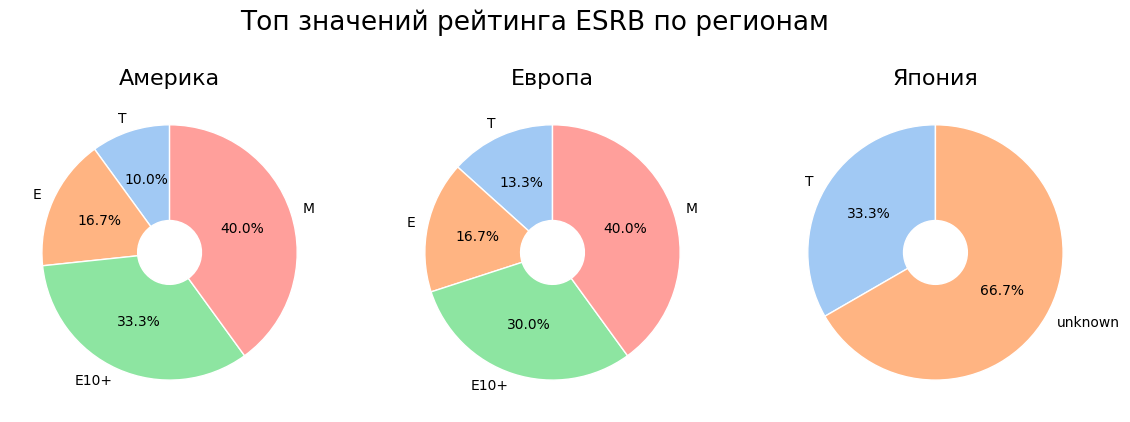

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")[0:6]
size = 0.75

ax1.pie(
    na_rating_top["na_sales"],
    labels=na_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_rating_top["eu_sales"],
    labels=eu_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_rating_top["jp_sales"],
    labels=jp_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ значений рейтинга ESRB по регионам", fontsize=19)
plt.show()

При расчете медианных значений региональных продаж по рейтингу ESRB, вырисовывается следующая картина - в Европе и Америке ситуация в целом одинаковая: 40% - игры "17+", 30% - игры "10+", 16.7% - игры категории "для всех" и 10% - "13+". Получается, что европейский рынок заинтересован в присвоении американского рейтинга для своего продукта.

В Японии большая часть покупок - 67%, приходится на игры не имеющие рейтинг ESRB и 30% на игры с рейтингом "13+". Вероятно, это связано с тем, что в Японии большинство играет в японские игры, которым присваютвают не ESRB рейтинг, а местный.

### Проверка гипотез

**Платформы:**

Нулевая гипотеза H_0 - средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза H_a - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Гипотезы буду проверять методом `ttest_ind` позволяющим проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [72]:
results = st.ttest_ind(
    data_actual_years.query('platform == "xone" and user_score.notna()')['user_score'], 
    data_actual_years.query('platform == "pc" and user_score.notna()')['user_score'], 
    equal_var = False
) 

#задаю значение уровня значимости
alpha = .05 


print(results.pvalue)

if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

0.11601398086668918
Не получилось отвергнуть нулевую гипотезу


Таким образом, получается, что нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются. 

**Жанры:**

Нулевая гипотеза H_0 - средние пользовательские рейтинги жанров `Action` и `Sports` равны.

Альтернативная гипотеза H_a - средние пользовательские рейтинги жанров `Action` и `Sports` не равны.

Гипотезы буду проверять методом `ttest_ind` позволяющим проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [73]:
results = st.ttest_ind(
    data_actual_years.query('genre == "action" and user_score.notna()')['user_score'], 
    data_actual_years.query('genre == "sports" and user_score.notna()')['user_score'], 
    equal_var = False
) 

#задаю значение уровня значимости
alpha = .05 


print(results.pvalue)

if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

1.182555038264477e-14
Отвергаем нулевую гипотезу


Таким образом подтверждается альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports имеют значимые различия.

## Выводы

### Предобработка данных

В ходе предобработки данных были проведены следующие операции:
* приведение данных в надлежащий вид - понижение регистра, изменение типов данных,
* обработаны значения `tbd` в столбце `user_score`,
* проанализированы и обработаны пропущенные значения в столбцах

### Исследовательский анализ данных

Прежде всего было рассмотрено количество игр выпущенных в разные годы

<Axes: title={'center': 'Количество релизов игр в зависимости от года'}, xlabel='Год релиза', ylabel='Количество игр'>

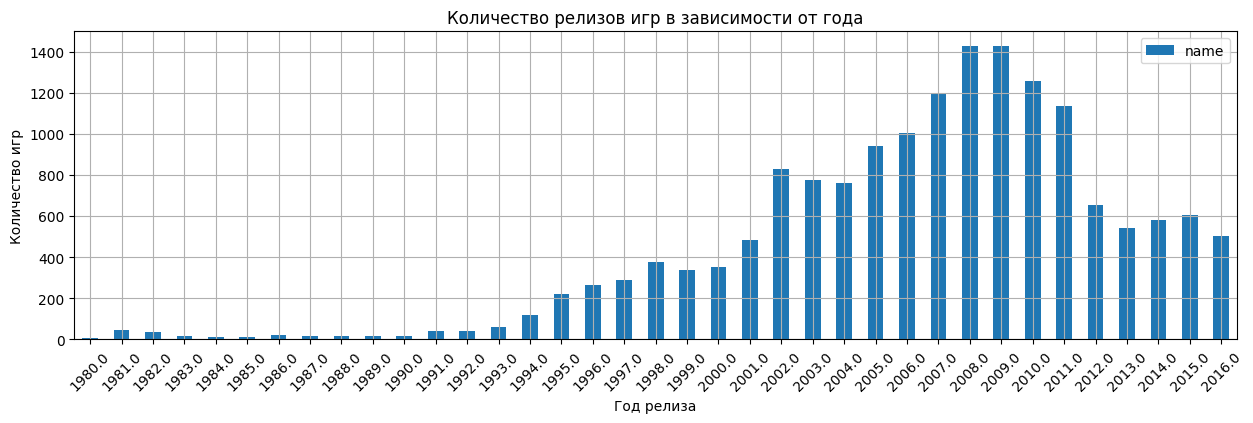

In [74]:
data.groupby("year_of_release")["name"].count().reset_index().plot(
    kind="bar",
    x="year_of_release",
    y="name",
    rot=45,
    figsize=(15, 4),
    grid=True,
    title="Количество релизов игр в зависимости от года",
    xlabel="Год релиза",
    ylabel="Количество игр",
)

Игровая индустрия начала активно развиваться начиная с 1993 года, с каждым последующим годом выпуская все больше игр. Пики по количеству выпущенных игр приходятся на 2008 и 2009 год - по 1400 игр на каждый. Далее кривая количества снижается, вероятно, качество начинает преобладать над количеством. с 2012 по 2016 выпускалось уже в районе 500-600 игр в год.

Данные до 1993 года можно не учитывать, поскольку до 1993 года было выпущено очень мало игр.

Далее были рассмотрены все платформы с суммарными продажами

<Axes: title={'center': 'Популярность платформ'}, xlabel='Платформа', ylabel='Количество продаж, млн.'>

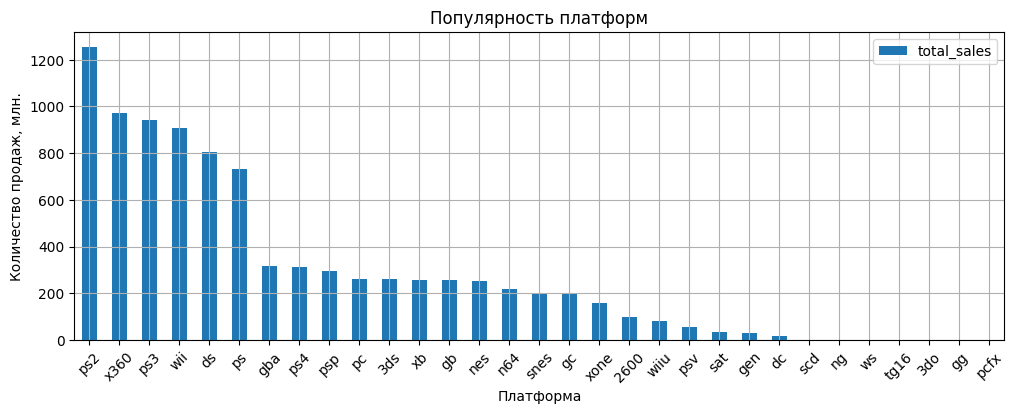

In [75]:
(
    data.groupby("platform")["total_sales"]
    .sum()
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
    .plot(
        kind="bar",
        x="platform",
        y="total_sales",
        rot=45,
        figsize=(12, 4),
        grid=True,
        title="Популярность платформ",
        xlabel="Платформа",
        ylabel="Количество продаж, млн.",
    )
)

Среди всех значений, на данном графике сильно выделяются первые шесть платформ: `ps2`, `x360`, `ps3`, `wii`, `ds` и `ps`.

Предложено отбросить остальные платформы и для оставшихся ознакомиться с распределением общих продаж по годам.

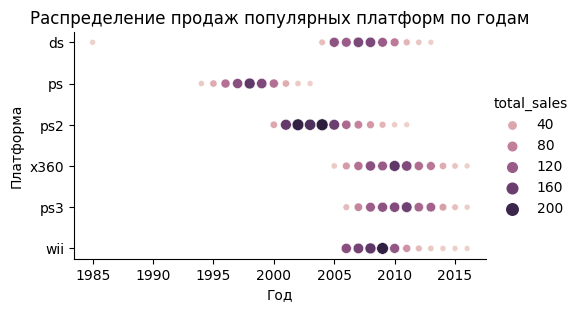

In [76]:
sns.relplot(
    data=platform_good_sales,
    x="year_of_release",
    y="platform",
    hue="total_sales",
    size="total_sales",
    height=3,
    aspect=1.7,
).set(
    title="Распределение продаж популярных платформ по годам",
    xlabel="Год",
    ylabel="Платформа",
)

Наиболее успешными платформами с большим количеством продаж были:
* `ds` - в течение 5 лет продано 600-800 млн копий, игры перестали выходить в 2014 году.
* `ps` - в течение 5 лет продано ~700 млн копий, игры перестали выходить в 2004 году.
* `ps2` - втечение 5 лет продано ~900 млн копий, игры перестали выходить в 2012 году.
* `wii` - в первые 5 лет продано  ~740 млн копий, игры до сих пор выходят, но продажи снизились в 3-4 раза. Платформа в конце своего жизненного цикла.
* `x360` и `ps3` - ~700 млн копий за 5 лет. Платформы в конце своего жизненного цикла.

По имеющимся данным был рассчитан средний срок жизни платформы. Он составляет 6 лет.

Зная средний срок жизни платформы, был определен актуальный для исследования временной период по которому можно определить какие платформы приближаются к концу жизненного цикла, а какие только в начале, и составить прогноз по перспективным платформам на 2017 год.

Данный период находится в пределах 2014-2016 года.

По данному периоду были построены графики суммарных продаж по платформам а зависимости от года.

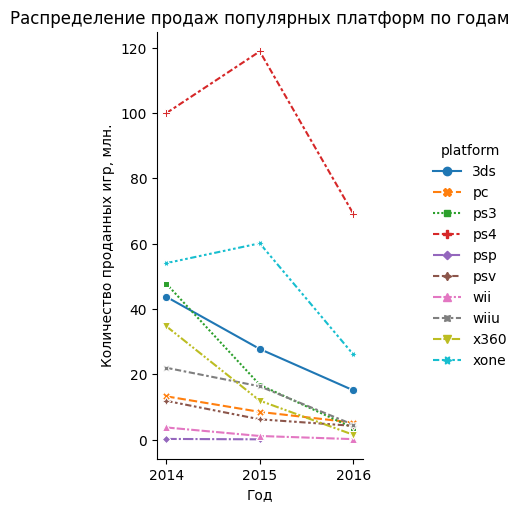

In [77]:
sns.relplot(
    data=years_to_predict,
    x="year_of_release",
    y="total_sales",
    hue="platform",
    kind="line",
    markers=True,
    style="platform",
    height=5,
    aspect=0.6,
).set(
    title="Распределение продаж популярных платформ по годам",
    xlabel="Год",
    ylabel="Количество проданных игр, млн.",
)

Картина за 2014-2106гг. показывает общий спад продаж для всех платформ, за исключением двух - `ps4` и `xone`.

* `ps4` - платформа, вышешдшая на смену `ps3` за полтора года сравнялась по продажам со своей прдшественницей и, с каждым годом увеличивая продажи, в 2015 году достигла пика в 120 млн проданных копий, в 2016 году виден резкий спад продаж почти в два раза, что можно объяснить неполными данными за 2016 год. 
* `xone` - данная платформа как и `ps4` вышла в 2013 году, но, судя по суммарным продажам, не повторила успеха конкуреннта - значения продаж в каждом году ~ в 2 раза меньше, чем у `ps4` - 25млн копий.

Таким образом, наиболее перспективными, за счет своей "молодости", являются платформы `ps4` и `xone`. Также, стоит отметить `pc`, как самую стабильную платформу, окончания жизненного цикла которой в ближайшие годы не ожидается.

Также было определено медианное распределение общих продаж по платформам за актуальный период.

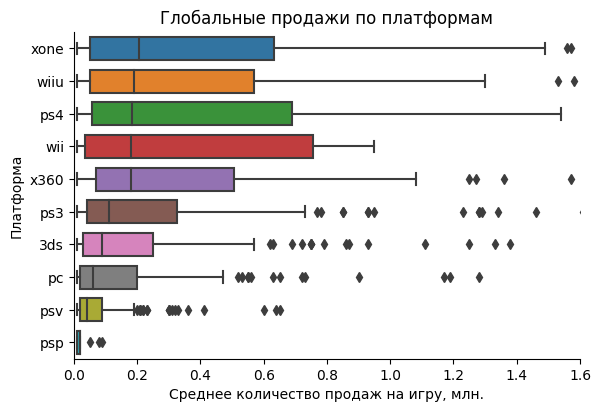

In [78]:
sns.catplot(
    data=data_actual_years,
    x="total_sales",
    y="platform",
    kind="box",
    orient="h",
    height=4,
    width=0.7,
    aspect=1.5,
    order=order_values["platform"],
).set(
    xlim=(0, 1.6),
    title="Глобальные продажи по платформам",
    xlabel="Среднее количество продаж на игру, млн.",
    ylabel="Платформа",
)

Глядя на зависимость медианных значений общих продаж в разбивке по платформам за актуальный период можно увидеть четверку платформ-лидеров - `xone`, `wiiu`, `ps4` и `wii`.

В предыдущем пункте, при поиске наиболее перспективных платформ на 2017 год, график распределения суммарных продаж по платформам за период 2014-2016гг. показал, что суммарных продаж на `ps4` ~ в 2 раза больше, чем у `xone` за тот же период. Тем не менее, медианное значение продаж у xone превышает медианное у `ps4`. Вероятно, так получилось из-за выхода суперпопулярных игр, у которых большое количество продаж и на ящике с усами они находятся в выбросах. То есть продажи игр у `xone` более стабильные.

У платформы `wiiu`, ее медианное значение продаж такое же как и у `ps4`. Это относительно молодая платформа, всего на год старше `ps4` и без учета данных 2016 года показывает относительно стабильные продажи.

Платформа `wii` вышла в 2006 году, ее преемницей является `wiiu` и в ближайшее время жизненный цикл `wii` закончится.

Таким образом, 
* перспективными платформами являются `ps4` и `xone`, 
* платформа с невысокими, но стабильными продажами, которая будет актуальна еще пару лет - `wiiu`,
* платформа с низкими продажами, но в перспективе обладающая большим жизненным циклом - `pc`.

После определения перспективных платформ необходимо оценить влияние отзывов критиков и пользователей на продажи.

Для этого были определены коэффициенты корреляции Пирсона по отзывам и общим продажам для всех платорм.

<Axes: title={'center': 'Корреляция между продажами и отзывами критиков'}, xlabel='Платформа', ylabel='Коэффициент корреляциии'>

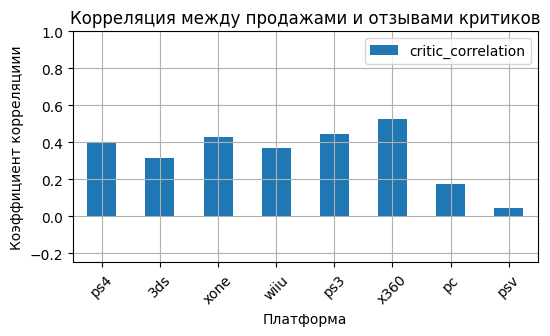

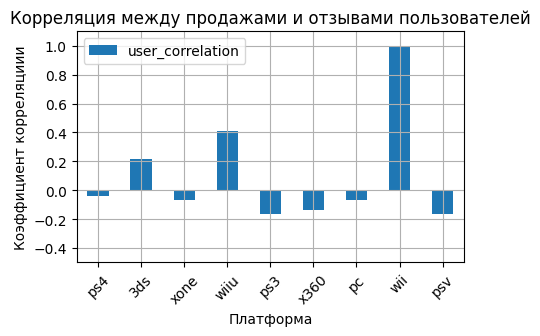

In [79]:
display(
    data_corr.query("critic_correlation.notna()").plot(
        x="platform",
        y="critic_correlation",
        kind="bar",
        rot=45,
        grid=True,
        ylim=(-0.25, 1),
        figsize=(6, 3),
        title="Корреляция между продажами и отзывами критиков",
        xlabel="Платформа",
        ylabel="Коэффициент корреляциии",
    )
)

data_corr.query("user_correlation.notna()").plot(
    x="platform",
    y="user_correlation",
    kind="bar",
    rot=45,
    grid=True,
    ylim=(-0.5, 1.1),
    figsize=(5, 3),
    title="Корреляция между продажами и отзывами пользователей",
    xlabel="Платформа",
    ylabel="Коэффициент корреляциии",
)
plt.show()

Коэффициент корреляции по пользователям и продажам между всеми платформами принимает как положительные, так и отрицательные значения, то есть нельзя уверенно сказать о прямой зависимости.

Коэффициент корреляции по критикам и продажам показывает более интересную картину - значения коэффициента положительные и лежат в диапазоне от 0.04 до 0.53. В данном случае можно сказать, что зависимость есть, что люди прислушиваются к мнению критиков перед покупкой той или иной игры.

Далее определяли самые продаваемые жанры.

<Axes: title={'center': 'Популярность жанров'}, xlabel='Жанр', ylabel='Медиана продаж'>

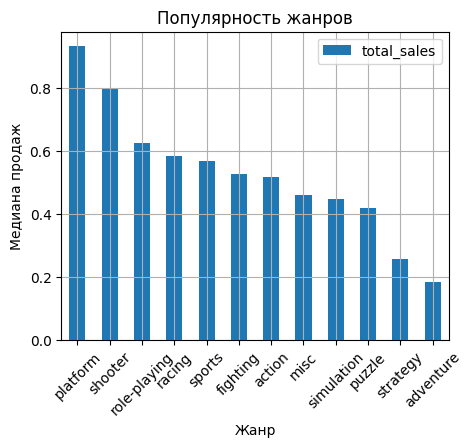

In [80]:
data.groupby("genre")["total_sales"].mean().reset_index().sort_values(
    by="total_sales", ascending=False
).plot(
    kind="bar",
    x="genre",
    y="total_sales",
    rot=45,
    figsize=(5, 4),
    grid=True,
    title="Популярность жанров",
    xlabel="Жанр",
    ylabel="Медиана продаж",
)

Самые высокие средние продажи имеют жанры `platform` и `shooter` - в среднем одна игра продается 0.9 и 0.8 млн. раз соответственно.

Самыми низкопродаваемыми жанрами являются - `adventure` и `strategy` - 0.20-0.25 млн продаж на игру.

Следующей задачей было определение портрета пользователя для каждого региона - Америка, Европа и Япония.

Прежде всего определили топ-5 платформ по продажам для каждого региона.

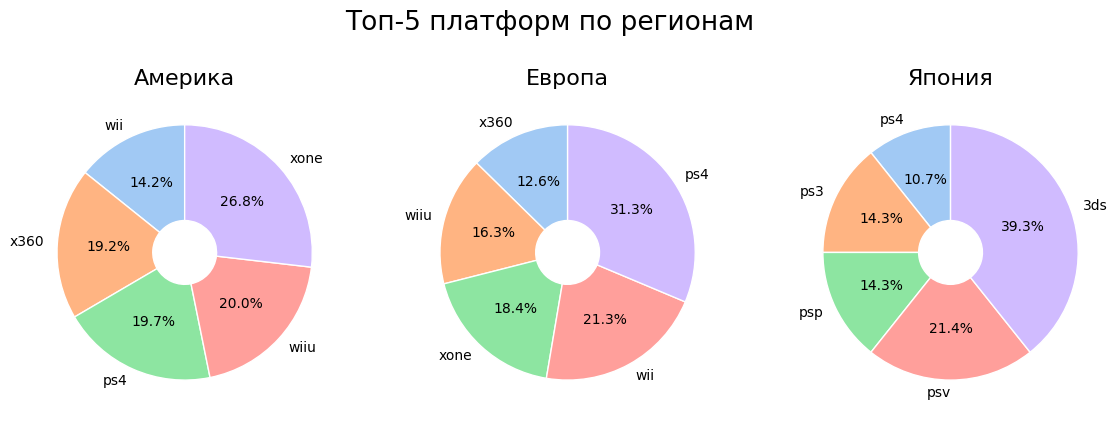

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")[0:5]
size = 0.75

ax1.pie(
    na_platform_top["na_sales"],
    labels=na_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_platform_top["eu_sales"],
    labels=eu_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_platform_top["jp_sales"],
    labels=jp_platform_top["platform"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ-5 платформ по регионам", fontsize=19)
plt.show()

В Америке и Европе предпочитают стационарые платформы, в то время как в Японии - 75% портативные (`3ds`, `psv` и `psp`) и 25% - стационарные (`ps3` и `ps4`). Кроме того, японцы предпочитают отечественного производителя.

Поскольку, `wii` и `wiiu`, `x360` и `xone` разные поколения одной платформы, думаю, что их можно считать как одну категорию. Поскольку консоли старого поколения подходят к концу жизненного цикла, обладающие ей пользователи, с большой вероятностью перейдут на консоли нового поколения как только перестанут выходить игры на старую.

В Америке наиболее популярной платформой является `x360` и ее преемница `xone` - по 26.3%. Следующая группа по популярности - `wiiu` и `wii` - 23.7% и 10.5%. И, наконец, `ps4` - 13.2%.

В Европе на семейство `wii` проиходится 48.6% на двоих: 32.4% - `wii` и 16.2% - `wiiu`. Следующая группа - `xone` и `x360` - 18.9% и 13.5%. И, наконец, `ps4` - 18.9%.

Затем определили топ-5 жанров для каждого из регионов.

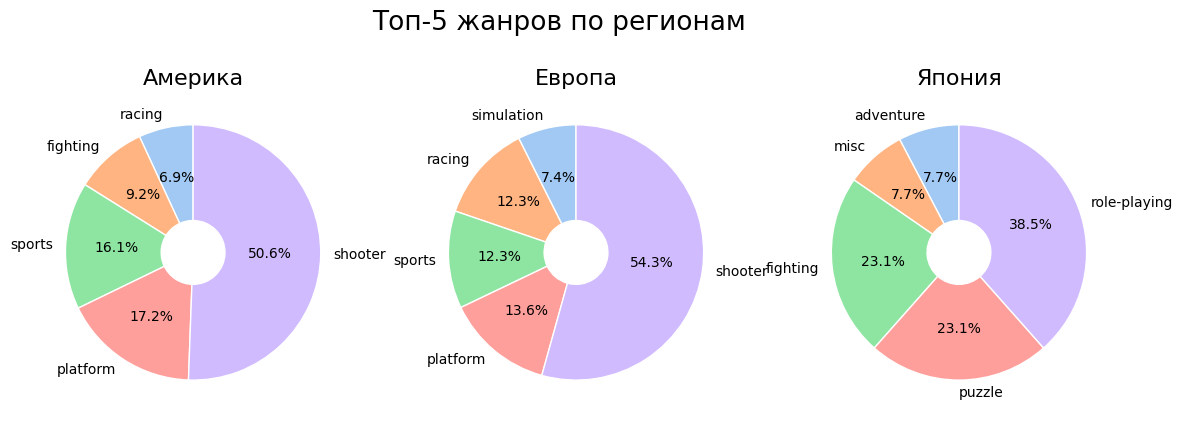

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")
size = 0.75

ax1.pie(
    na_genre_top["na_sales"],
    labels=na_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_genre_top["eu_sales"],
    labels=eu_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_genre_top["jp_sales"],
    labels=jp_genre_top["genre"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ-5 жанров по регионам", fontsize=19)
plt.show()

В отношении жанров Япония снова выделяется - 38.5% продаж приходится на `role-playing`, по 23.1% на `puzzle` и `fighting` и по 7.7% на `adventure` и `misc`.

В Европе с Америкой картина по топ-3 жанрам в целом одинаковая: более 50% приходится на жанр `action`, 12-16% на жанр `sports` и 13-17% на жанр `platform`. Еще один общий жанр - `racing` - 12.3% для Европы и 6.9% для Америки. Оставшиеся доли приходятся на `fighting` в Америке - 9.2%, и `simulation` для Европы - 7.4%.

Далее были определена целевая аудитория в зависимости от возраста пользователей.

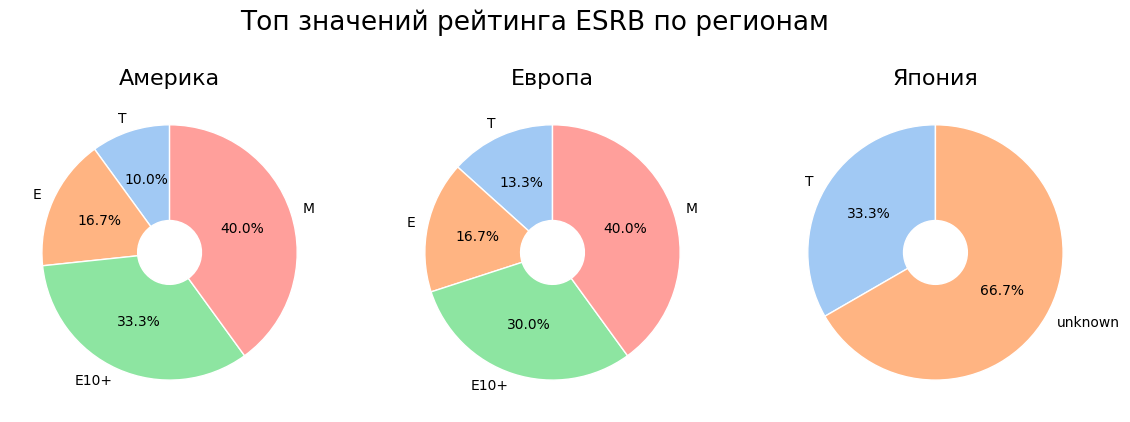

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
colors = sns.color_palette("pastel")[0:6]
size = 0.75

ax1.pie(
    na_rating_top["na_sales"],
    labels=na_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax1.set_title("Америка", fontsize=16)
ax2.pie(
    eu_rating_top["eu_sales"],
    labels=eu_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)

ax2.set_title("Европа", fontsize=16)
ax3.pie(
    jp_rating_top["jp_sales"],
    labels=jp_rating_top["rating"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=size, edgecolor="w"),
    colors=colors,
    normalize=True,
)
ax3.set_title("Япония", fontsize=16)

fig.suptitle("Топ значений рейтинга ESRB по регионам", fontsize=19)
plt.show()

При расчете медианных значений региональных продаж по рейтингу ESRB, вырисовывается следующая картина - в Европе и Америке ситуация в целом одинаковая: 40% - игры "17+", 30% - игры "10+", 16.7% - игры категории "для всех" и 10% - "13+".

В Японии большая часть покупок - 67%, приходится на игры не имеющие рейтинг ESRB и 30% на игры с рейтингом "13+". Вероятно, это связано с тем, что в Японии большинство играет в японские игры, которым присваютвают не ESRB рейтинг, а местный.

В ходе исследования были **сформулированы** и **проверены** гипотезы:
* средние пользовательские рейтинги платформ `Xbox One` и `PC` равны,
    * альтернативная гипотеза - средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны;
* средние пользовательские рейтинги жанров `Action` и `Sports` равны,
    * средние пользовательские рейтинги жанров `Action` и `Sports` не равны.
    
Проверка гипотез осуществлялась методом `ttest_ind` позволяющим проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

В ходе проверки было определено, что что средние пользовательские рейтинги платформ `Xbox One` и `PC` равны и средние пользовательские рейтинги платформ `Xbox One` и `PC` имеют значимые различия. 

### Резюме

Учитывая данные, полученные в ходе исследовательского анализа, можно сделать следующие обобщенные выводы:

Игровая индустрия бурно развивается начиная с 1993. Самыми насыщенными, в плане выпуска игр, годами были 2008 и 2009 год. Далее игровые компании снизили обороты производства, ориентируясь уже на качество, нежели на количество.

С развитием технологий, стали развиваться и игровые платформы. В среднем, **каждые 6 лет** выходит консоль нового поколения.

В настоящий момент, перспективными платформами являются **`xone`** и **`ps4`**. Их предшественницы в течение всего своего жизненного цикла показывали высокие продажи, по сравнению с остальными платформами и `xone` с `ps4` с большой вероятностью повторят их успех. Менее денежная, но находящаяся в расцвете сил - платформа **`wiiu`** - еще несколько лет будет популярна в кругах своей целевой аудитории.

Исследовательский анализ показал, что **не стоит недооценивать отзывов критиков**, поскольку они имеют, хоть и не прямое, но заметное влияние на продажи.

В ходе анализа было проведено сравнение показателей рынка Америки, Европы и Японии. Данные показатели необходимо учесть при планировании рекламной компании в регионах.

Средний **американский и европейский в целом идентичны:**
* самые популярные платформы - семейство Xbox, Wii и PlayStation;
* самые популярные жанры - экшн, платформеры и спорт.
* доли продаж относительно американского возрастного рейтинга ESRB также идентичны, то есть европейский рынок заинтересован в присвоении данного рейтинга для своего продукта.

В Японии же картина абсолютно иная - анализ популярных плаформ, жанров и влияния рейтинга показал, что **рынок Японии самобытен и самодостаточен**, потребитель из Японии предпочитает локальные продукты иностранным:
* самые популярные платформы в Японии - семейство Nintendo и PlayStation, предпочтение отдают портативным платформам,
* самые популярные жанры - ролевые игры, паззл и файтинг,
* ориентировки на американский возрастной рейтинг не наблюдается, вероятно, поскольку есть локальный.
